In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from keras.layers import Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
BATCH_SIZE =32
IMAGE_SIZE = 854,480
CHANNELS=3
EPOCHS=3

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"/content/gdrive/MyDrive/Chemical",labels='inferred',shuffle=True)

Found 400 files belonging to 2 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Allowed', 'Not allowed']

In [ ]:
for image_batch, labels_batch in dataset.take(1):
 print(image_batch.shape)
 print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1]


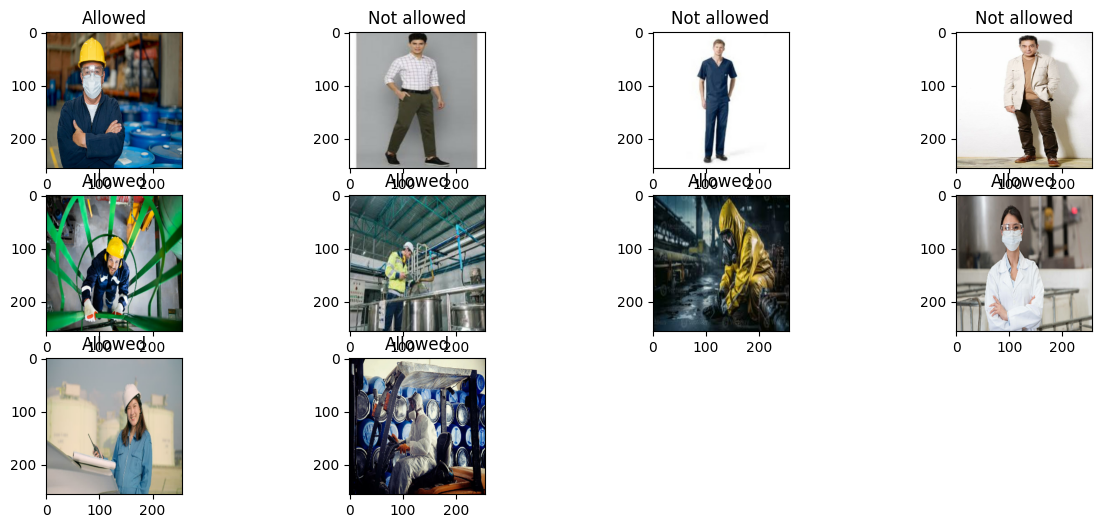

In [ ]:
plt.figure(figsize=(15, 6))
for image_batch, labels_batch in dataset.take(1):
 for i in range(10):
  ax = plt.subplot(3, 4, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  plt.title(class_names[labels_batch[i]])
  plt.axis("on")

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8,  test_split=0.2, shuffle=True, shuffle_size=10):
    assert (train_split + test_split ) == 1
    ds_size = len(ds)
    if shuffle:
       ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    train_ds = ds.take(train_size)
    test_ds = ds.skip(train_size)
    return train_ds, test_ds
train_ds,test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
train_ds = train_ds.cache().shuffle(10).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
layers.experimental.preprocessing.Resizing(256,256),
layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
layers.experimental.preprocessing.RandomRotation(0),
])

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
input_shape = (BATCH_SIZE,256,256, CHANNELS)
n_classes = 2

In [ ]:
import keras
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, Flatten, Dense
from tensorflow.keras import layers, models

input_shape = (256, 256, 3)
input_tensor = layers.Input(shape=input_shape)

# Stage 1
x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_tensor)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Stage 2
shortcut = x

x = layers.Conv2D(64, (1, 1), strides=(1, 1), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Conv2D(256, (1, 1), strides=(1, 1), padding='same')(x)
x = layers.BatchNormalization()(x)

shortcut = layers.Conv2D(256, (1, 1), strides=(1, 1), padding='same')(shortcut)
shortcut = layers.BatchNormalization()(shortcut)

x = layers.add([x, shortcut])
x = layers.Activation('relu')(x)

# Output layer
x = layers.Flatten()(x)
output = layers.Dense(n_classes, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output)



In [ ]:
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 64)         9472      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 128, 128, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 128, 128, 64)         0         ['batch_normalization[0][0

In [ ]:
model.compile(
    optimizer='AdaDelta',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds,
    batch_size=32,
    verbose=1,
    epochs=50,
)

Epoch 1/50
10/10 [==============================] - 23s 335ms/step - loss: 0.9006 - accuracy: 0.5526
Epoch 2/50
10/10 [==============================] - 3s 273ms/step - loss: 0.4635 - accuracy: 0.8059
Epoch 3/50
10/10 [==============================] - 3s 246ms/step - loss: 0.3809 - accuracy: 0.8388
Epoch 4/50
10/10 [==============================] - 3s 253ms/step - loss: 0.2904 - accuracy: 0.8717
Epoch 5/50
10/10 [==============================] - 3s 258ms/step - loss: 0.2827 - accuracy: 0.8816
Epoch 6/50
10/10 [==============================] - 3s 344ms/step - loss: 0.2545 - accuracy: 0.8980
Epoch 7/50
10/10 [==============================] - 3s 252ms/step - loss: 0.2190 - accuracy: 0.9079
Epoch 8/50
10/10 [==============================] - 3s 254ms/step - loss: 0.1967 - accuracy: 0.9211
Epoch 9/50
10/10 [==============================] - 3s 256ms/step - loss: 0.1889 - accuracy: 0.9243
Epoch 10/50
10/10 [==============================] - 3s 261ms/step - loss: 0.1872 - accuracy: 0.924

In [ ]:
scores = model.evaluate(train_ds)

10/10 [==============================] - 3s 235ms/step - loss: 0.0206 - accuracy: 0.9967


In [ ]:
scores = model.evaluate(test_ds)

3/3 [==============================] - 2s 40ms/step - loss: 0.1096 - accuracy: 0.9792


first image to predict
actual label: Not allowed
1/1 [==============================] - 0s 38ms/step
predicted label: Not allowed


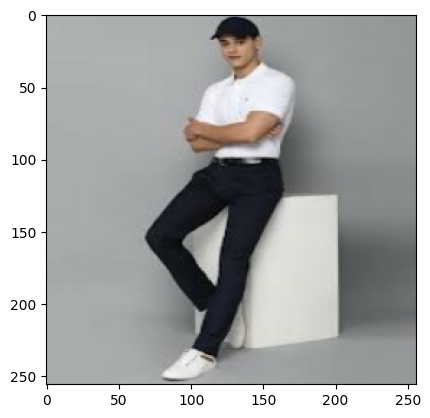

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[2].numpy().astype('uint8')
    first_label = labels_batch[2].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[2])])

In [ ]:
model.save('rN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 21ms/step


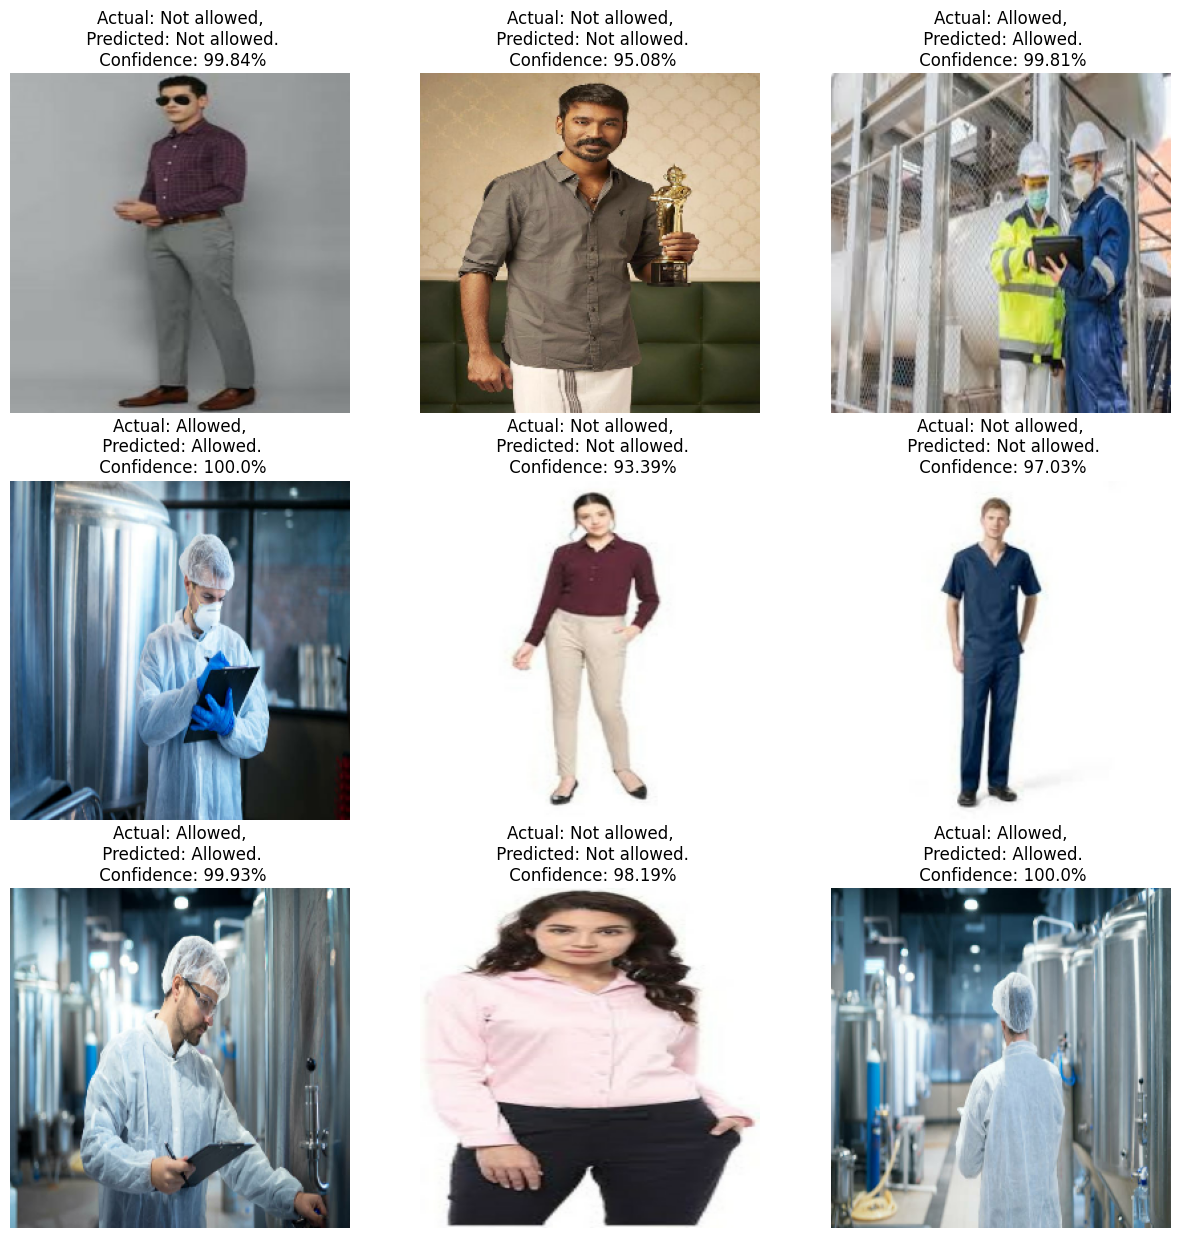

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      predicted_class, confidence = predict(model, images[i].numpy())
      actual_class = class_names[labels[i]]
      plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
      plt.axis("off")